In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Import_Igor
import utilities

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# Load the file
igor_bin = Import_Igor.get_stack(r"D:\data_input\20220405\nat_mono_4Hz.smh")
# Get the trigger channel
trigger_channel_array = igor_bin.channel2

Getting stack...
Making note of old path: C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\twoPanalysis
Changing path to: D:\data_input
Done
Getting data from D:\data_input\20220405\nat_mono_4Hz.smh
Data retrieved.
Reading header...
Header read.
Converting to serialised data...
Conversion complete.
Reverting path.


interactive(children=(IntSlider(value=1, description='frame', max=1839), Output()), _dom_classes=('widget-inte…

<function __main__.show_frame(frame)>

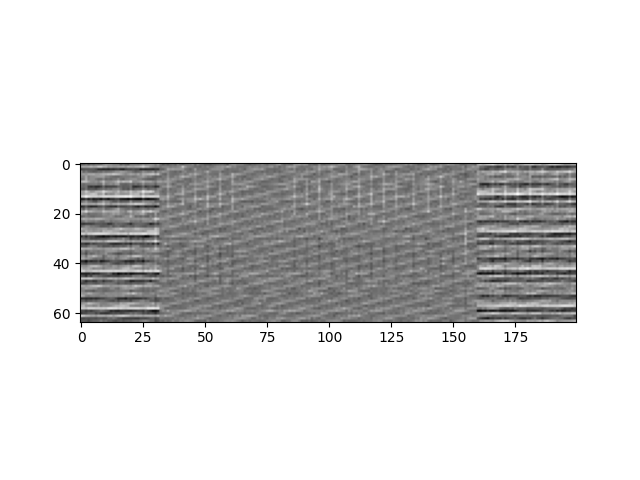

In [10]:
# %matplotlib widget

# Little script for plotting trigger channel
max_length = len(trigger_channel_array)-1
fig = plt.figure()
def show_frame(frame):
    plt.imshow(trigger_channel_array[frame], cmap='Greys')
    fig.canvas.draw()
interact(show_frame, frame= widgets.IntSlider(min=0, max=max_length, step=1, value=1, continuous_update=True))

In [142]:
# # Dirty solution for serialising the data in trigger_channel_array (instead of using list, should pre-allocate RAM via np.empty()...)
# serialised_channel2 = []
# for i in trigger_channel_array:
#     serial = i.reshape(1, i.size)
#     serialised_channel2.append(serial)
# serialised_channel2 = np.array(serialised_channel2).reshape(1, a.channel2.size)
# serialised_channel2.shape
# serialised_ch2 = serialised_channel2[0]

In [156]:
# Beautiful solution for serialising the data in trigger_channel_array (including pre-allocating RAM!)
size_by_framenum_array = np.empty((len(trigger_channel_array), trigger_channel_array[0].size))
for n, frame in enumerate(trigger_channel_array):
    serial = frame.reshape(1, frame.size)
    size_by_framenum_array[n] = serial
serialised_channel2 = size_by_framenum_array.reshape(1, trigger_channel_array.size)
del size_by_framenum_array

print(size_by_framenum_array.shape)
print(serialised_channel2.shape)


(1840, 12800)
(1, 23552000)


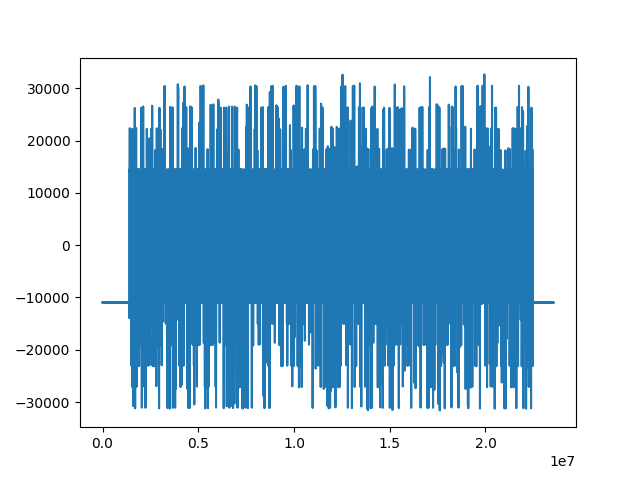

In [157]:
%matplotlib widget
#Plot the resulting, serialised trace (x-axis is pixel, y-axis is pixel-value)
plt.plot(serialised_channel2.T) # tranpsposed to avoid making several million plots (with memory allocation in the tebibyte-range)

In [30]:
# Then we binarise the serialised trigger data
binarised_ch2 = np.where(serialised_ch2 > 10000, 1, 0)

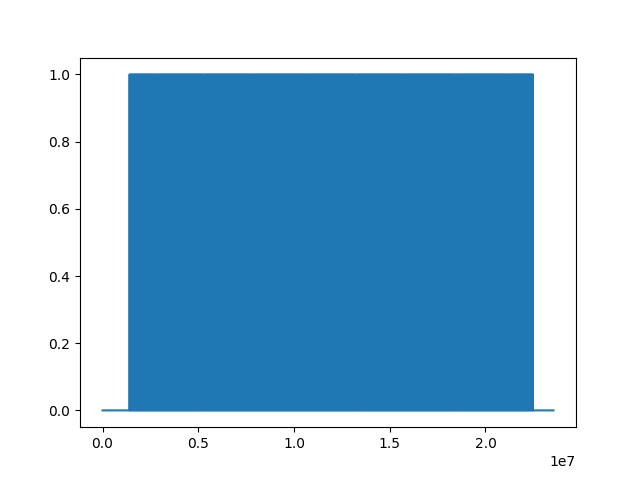

In [86]:
# Plot this
%matplotlib widget
plt.plot(binarised_ch2)

In [34]:
# Do a little cheeky boolean search for whether index i > i-1 (basically rising flank detection) 
where_trig_starts = binarised_ch2[:-1] > binarised_ch2[1:]
print(where_trig_starts)

[False False False ... False False False]


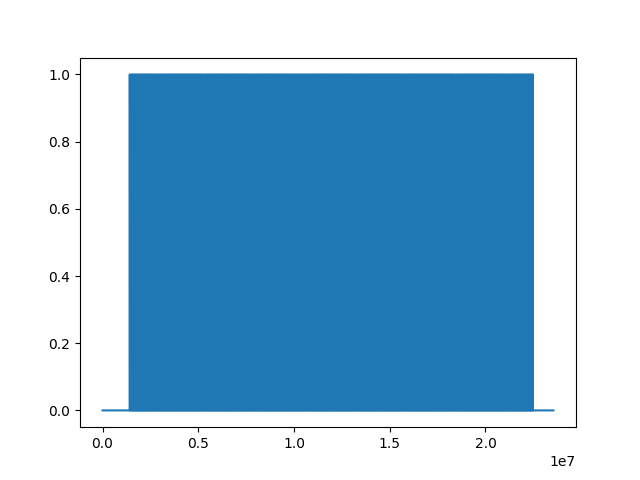

In [53]:
# Plot this
%matplotlib widget
plt.plot(where_trig_starts)

In [36]:
# Et voila, thats our trigger signal. Now we need to convert it back to a frame-index 

In [67]:
# Get the frame indeces for trigger onset
trig_onset_index = np.where(where_trig_starts > 0)
trig_onset_index

300

In [103]:
# Then divide each number in trig_onset_index by the amount of lines
lines_in_scan = 200*64
frame_of_trig = np.around(trig_onset_index[0]/lines_in_scan, 0)
frame_of_trig

array([ 111.,  117.,  122.,  128.,  133.,  138.,  144.,  149.,  155.,
        160.,  166.,  171.,  177.,  182.,  188.,  193.,  199.,  204.,
        210.,  216.,  221.,  227.,  232.,  238.,  243.,  249.,  254.,
        260.,  265.,  270.,  276.,  281.,  287.,  292.,  298.,  303.,
        309.,  314.,  320.,  325.,  331.,  336.,  342.,  347.,  352.,
        358.,  363.,  369.,  374.,  380.,  385.,  391.,  396.,  402.,
        407.,  413.,  419.,  425.,  430.,  436.,  441.,  447.,  452.,
        458.,  463.,  469.,  474.,  479.,  485.,  490.,  496.,  501.,
        507.,  512.,  518.,  523.,  529.,  534.,  540.,  545.,  551.,
        556.,  561.,  567.,  572.,  578.,  583.,  589.,  594.,  600.,
        605.,  611.,  616.,  622.,  628.,  633.,  639.,  644.,  650.,
        655.,  661.,  666.,  672.,  677.,  683.,  688.,  694.,  699.,
        705.,  710.,  715.,  721.,  726.,  732.,  737.,  743.,  748.,
        754.,  759.,  765.,  770.,  776.,  781.,  787.,  792.,  798.,
        803.,  809.,

In [101]:
#Check that the amount of trigs makes sense
trigs_target = 30*10 # (stims x repeats)
trigs_found = len(frame_of_trig)
print(trigs_target, trigs_found)

300 300


In [114]:
# Make a frame-based trig trace
frame_number = len(trigger_channel_array)
trig_trace = np.empty(frame_number)
for i in frame_of_trig:
    trig_trace[int(i)] = 1

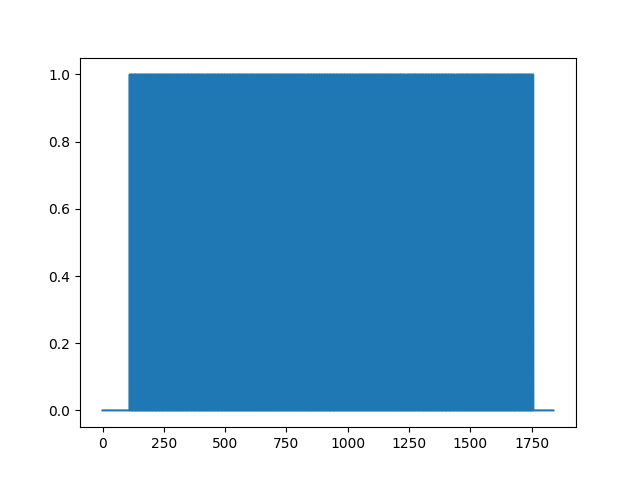

In [115]:
%matplotlib widget
plt.plot(trig_trace)

# Testing scripts

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Import_Igor
import utilities

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
igor_bin = Import_Igor.get_stack(r"D:\data_input\20220405\nat_mono_4Hz.smh")
# Get the trigger channel
trigger_channel_array = igor_bin.channel2

Getting stack...
Making note of old path: C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\twoPanalysis
Changing path to: D:\data_input
Done
Getting data from D:\data_input\20220405\nat_mono_4Hz.smh
Data retrieved.
Reading header...
Header read.
Converting to serialised data...
Conversion complete.
Reverting path.


In [7]:
a = utilities.data.trigger_trace_by_line(trigger_channel_array)


12800 (1840, 64, 200)


In [4]:
a

array([0., 0., 0., ..., 0., 0., 0.])

In [5]:
a.shape

(1840,)

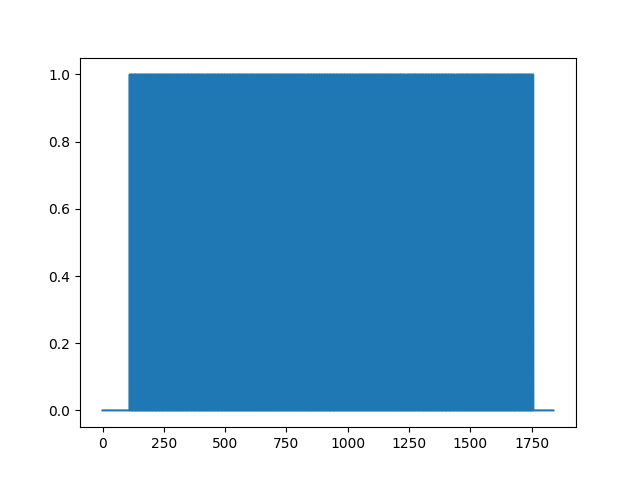

In [6]:
%matplotlib widget

plt.plot(a)